In [390]:
import pandas as pd
import numpy as np
import qgrid
import matplotlib.pyplot as plt

In [607]:
gdp=pd.read_csv('GDPq.csv')
qgrid_widget=qgrid.show_grid(gdp,show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [608]:
gdp=qgrid_widget.get_changed_df()

In [609]:
gdp.LOCATION.unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'ARG', 'BRA', 'CHL', 'COL', 'CRI', 'EST',
       'IND', 'IDN', 'ISR', 'LVA', 'LTU', 'RUS', 'SAU', 'SVN', 'ZAF',
       'EU28', 'OECD', 'OECDE', 'G-7', 'G-20', 'EA19', 'BGR', 'ROU'],
      dtype=object)

In [610]:
m3=pd.read_csv('M3.csv')
qgrid_widget=qgrid.show_grid(m3,show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [611]:
m3=qgrid_widget.get_changed_df()

In [612]:
dates=pd.date_range(start='01.01.1960',end='01.01.2020',freq="M")

In [613]:
def dat(a):
    if len(str(a.month))==1:
        b=str(a.year)+'-0'+str(a.month)
    else:
        b=str(a.year)+'-'+str(a.month)
    return b

In [614]:
def contry_dat(country):
    dicts={}
    for date in dates:
        try:
    #         print(date, x.loc[dat(date)]['Value'])
            dicts[date]=m3[m3.LOCATION==country].sort_values(by='TIME').set_index("TIME").loc[dat(date)]['Value']
        except:
            pass
    return pd.DataFrame.from_dict(dicts,orient='index')

In [615]:
# 1962-11-30 --> 1962-Q1
quadic=dict(zip(range(1,13), ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3','Q4','Q4','Q4']))
date_re=lambda a: str(a.year)+'-'+quadic.get(a.month)

def country_dat_2(country):
    dicts={}
    for date in dates:
        try:
    #         print(date, x.loc[dat(date)]['Value'])
            dicts[date]=gdp[gdp.LOCATION==country].sort_values(by='TIME').set_index('TIME').loc[date_re(date)]['Value']
        except:
            pass
    return pd.DataFrame.from_dict(dicts,orient='index')

In [616]:
countries=set(gdp.LOCATION.unique())&set(m3.LOCATION.unique())

def all_d(cname):
    df=pd.concat([contry_dat(cname),country_dat_2(cname)],axis=1)
    df.columns=[cname+'_m3',cname+'_gdp']
#     df['cname']=[cname]*len(df)
    return df
all_d('AUS')

,AUS_m3,AUS_gdp
1960-01-31,NaN,17.105931
1960-02-29,0.394606,17.105931
1960-03-31,0.397772,17.105931
1960-04-30,0.400349,17.580023
1960-05-31,0.404804,17.580023
1960-06-30,0.407046,17.580023
1960-07-31,0.408222,17.619441
1960-08-31,0.409707,17.619441
1960-09-30,0.409988,17.619441
1960-10-31,0.410772,17.584073


In [617]:
big_t=[]
for country in countries:
    big_t.append(all_d(country))

In [618]:
dd=pd.concat(big_t,axis=1)

In [619]:
for country in countries:
    print(country,len(dd[[country+'_m3',country+'_gdp']].dropna()))

BRA 276
GBR 393
AUS 713
IND 93
JPN 309
ISR 297
SWE 707
CHL 192
NZL 372
ISL 270
USA 717
DNK 288
IDN 347
CAN 594
OECD 474
POL 288
EA19 297
OECDE 288
RUS 192
CZE 285
CRI 221
TUR 252
NOR 501
KOR 236
COL 177
ZAF 651
MEX 312
CHE 468
HUN 297


In [620]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
def preproc(X):
    cycle, trend = sm.tsa.filters.hpfilter(X, 160000000)
    result = seasonal_decompose(X, model='additive', freq=12)
    ses=result.seasonal
    X=X-trend-ses
    X=(X-X.mean())/X.std()#стандартизация 
    # X=(X-X.min())/(X.max()-X.min())#нормирование
    return X

In [636]:
country='USA'
month_and_quart=dd[[country+'_m3',country+'_gdp']].dropna()
# month_and_quart=preproc(month_and_quart)
print( len(month_and_quart))
#квартальные данные без повторений
month=month_and_quart[country+'_m3']
quart=month_and_quart[country+'_gdp'].resample('Q').mean()

month = ((1. + (np.log(month) - np.log(month.shift(1)))) ** 12) - 1.
quart = ((1. + (np.log(quart) - np.log(quart.shift(3)))) ** 4) - 1.

month = month[12:]
quart = quart[4:]

print(month.head(10))
print(month.tail(10))
print(quart.head(10))
print(quart.tail(10))

717
1961-01-31    0.067101
1961-02-28    0.095269
1961-03-31    0.070215
1961-04-30    0.061859
1961-05-31    0.089437
1961-06-30    0.080804
1961-07-31    0.049080
1961-08-31    0.076009
1961-09-30    0.071645
1961-10-31    0.059701
Freq: M, Name: USA_m3, dtype: float64
2018-12-31    0.090108
2019-01-31    0.065618
2019-02-28    0.013694
2019-03-31    0.028811
2019-04-30    0.039026
2019-05-31    0.076958
2019-06-30    0.118016
2019-07-31    0.076774
2019-08-31    0.057956
2019-09-30    0.080964
Freq: M, Name: USA_m3, dtype: float64
1961-03-31   -0.005226
1961-06-30    0.043255
1961-09-30    0.181485
1961-12-31    0.240084
1962-03-31    0.244068
1962-06-30    0.197530
1962-09-30    0.164850
1962-12-31    0.101616
1963-03-31    0.109641
1963-06-30    0.105101
Freq: Q-DEC, Name: USA_gdp, dtype: float64
2017-06-30    0.065536
2017-09-30    0.077595
2017-12-31    0.090593
2018-03-31    0.094740
2018-06-30    0.097984
2018-09-30    0.091561
2018-12-31    0.076307
2019-03-31    0.072040
201

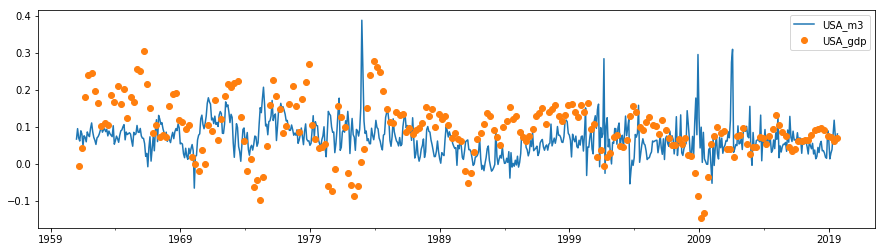

In [637]:
for_pp=pd.concat([month,quart],axis=1)
for_pp[[country+'_m3',country+'_gdp']].plot(figsize=(15,4), style=['-','o'])#.get_figure()
# gdp_yoy = ((1. + (np.log(quart) - np.log(quart.shift(3)))) ** 4) - 1.
# emp_yoy = ((1. + (np.log(month) - np.log(month.shift(1)))) ** 12) - 1.
# df = pd.concat([gdp_yoy, emp_yoy], axis=1)
# df.columns = [country+'_gdp',country+'_m3']
# fig=df[[country+'_gdp',country+'_m3']].plot(figsize=(15,4), style=['o','-'])
# fig.savefig("myplot.png")

In [638]:
# test_m3 (None,12,1)
# test_gdp (None,4,1)
# def 
month_sh=[month[i:i+12] for i in range(0,len(month)-11)]#формируем окна в 12 месяцев
X_m3=np.array(month_sh).reshape((len(month_sh),12,1))[:-1]#отбрасываем окно в последние 12 месяцев, потому что для него
# нет прогнозной точки
y_m3=np.array([month[i+12] for i in range(0,len(month)-12)])#формируем то, что будем предсказывать оканми - следующая дата окна.
# здесь хоть и i+12, но берется 13 точка, то есть след прогнозная
print(X_m3.shape)
y_m3.shape

(693, 12, 1)


(693,)

In [639]:
from datetime import date, timedelta, datetime
from dateutil.relativedelta import relativedelta

def get_first_day(dt, d_years=0, d_months=0):
    y, m = dt.year + d_years, dt.month + d_months
    a, m = divmod(m-1, 12)
    return date(y+a, m+1, 1)

def get_last_day(dt):
    return get_first_day(dt,0,1)+timedelta(-1)

def get_lag(date,month_lag):
    last_d=date+-timedelta(1)#возвращаем последнюю дату данных
    with_lag=last_d-relativedelta(months=month_lag) #отматываем на два квартала назад - отнимаем 5 месяце
    return get_last_day(with_lag)

f_m_q=[1,4,7,10] #1-й месяц квартала: 
s_m_q=[2,5,8,11] #2-й месяц квартала:
t_m_q=[3,6,9,12] #3-й месяц квартала:

#логика лаггирования - преполагаем, что как у росстата с ввп лаг публикации 2 месяца, то есть публикуется квартальное значение 
# индикактора на 3 месяц следующего квартала. Поэтому нужно так: для прогноза 1 и 2 - го мес кваратала t нужно
# предыдущей свертке ставить в соответствие квартал t-2, остальным - как положено, а 3 месяцу - t-1. 
# Сейчас для упрощения 3 месяцу тоже ставится t-2. Из предположения, что мы прогнозируем до 19 числа 3 месяца, то есь до публикации
# квартального значения за предыдцщий период.

def lagged_dates(quart, b): #b - последняя точка с имеющимися данными
    a=b+timedelta(1)# a - это прогнозируемый месяц
    if b.month in f_m_q:#если данные заканчиваются на  1,4,7,10 месяцем, то лаг будет 4
        zx=pd.concat([quart.loc[get_lag(a,11):get_lag(a,4)],# 7 - это минус два квартала
                          quart.loc[get_lag(a,5):get_lag(a,4)]],axis=0)#дубл
    else:
        zx=pd.concat([quart.loc[get_lag(a,12):get_lag(a,5)],# 7 - это минус два квартала
                          quart.loc[get_lag(a,6):get_lag(a,5)]],axis=0)#дублируем значение 2-х лагового квартала 
    return zx

In [640]:
quart_sh=[]
for i in range(0,len(month_sh[:-1])):
    b=month_sh[:-1][i].index[-1]# это точка с последними имеющимися данными
    quart_sh.append(lagged_dates(quart,b).values)
    
quart_sh_ar=np.array(quart_sh[1:])#отбрасываем первый вектор, потому что для него не хватает лага квартала
X_gdp=quart_sh_ar.reshape((len(quart_sh_ar),4,1))
print('итого должна быть такая размерность: {}'.format(X_gdp.shape))

итого должна быть такая размерность: (692, 4, 1)


### Строим нейронку

In [641]:
from numpy import hstack
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
from keras.layers import Flatten
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping

from keras.utils import plot_model
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


In [652]:
# np.random.seed(42)#для воспроизводимости результатов

# X_cnn_train=np.random.random_sample((50000,12, 1))
# X_cnn_test=np.random.random_sample((1000,12, 1))

# invest_train=np.random.random_sample((50000,4,1))
# invest_test=np.random.random_sample((1000,4,1))

# y_cnn_train=np.random.random_sample(50000)
# Y_cnn_test=np.random.random_sample(1000)

n=650
X_cnn_train=X_m3[1:][:n]
X_cnn_test=X_m3[1:][n:]

invest_train=X_gdp[:n]
invest_test=X_gdp[n:]

y_cnn_train=y_m3[1:][:n]
Y_cnn_test=y_m3[1:][n:]

n_steps=12

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
monthly (InputLayer)            (None, 12, 1)        0                                            
__________________________________________________________________________________________________
conv1d_128 (Conv1D)             (None, 4, 25)        100         monthly[0][0]                    
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 4, 25)        0           conv1d_128[0][0]                 
__________________________________________________________________________________________________
quartality (InputLayer)         (None, 4, 1)         0                                            
__________________________________________________________________________________________________
concatenat

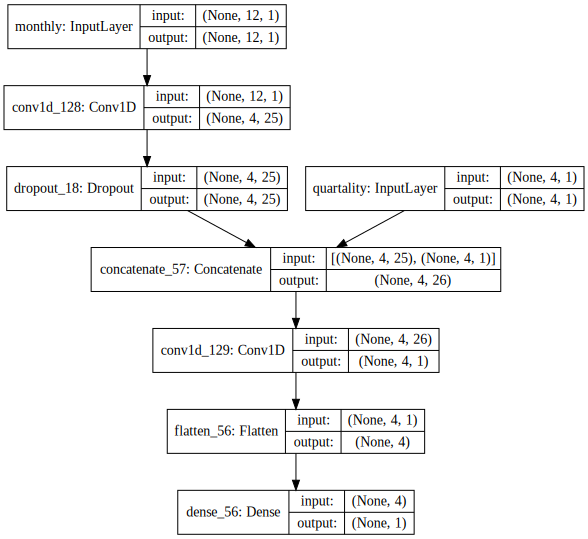

In [653]:
#1-d свертка всегда сворачивает всю панель фаткоров в одно наблюдение.

n_features = X_cnn_train.shape[2]

visible = Input(shape=(n_steps, n_features),name='monthly')
cnn = Conv1D(filters=25, kernel_size=3, 
#               padding='causal',
#               dilation_rate=4,
              strides=3,
              activation='linear')(visible)
#чтоб не смешивать ряды между собой заранее нужно отдельный инпут тогда для каждого 
cnn = Dropout(0.3)(cnn)

inv_inp = Input(shape=(4, 1),name='quartality')

z = concatenate([cnn,inv_inp],axis=-1)

merge = Conv1D(filters=1, kernel_size=1, activation='linear')(z)
merge = Flatten()(merge)
output = Dense(1, activation='linear')(merge)
model = Model(inputs=[visible,inv_inp], outputs=output)
model.summary()


SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, to_file='network2.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
monthly (InputLayer)            (None, 12, 1)        0                                            
__________________________________________________________________________________________________
conv1d_125 (Conv1D)             (None, 11, 25)       75          monthly[0][0]                    
__________________________________________________________________________________________________
conv1d_126 (Conv1D)             (None, 4, 1)         51          conv1d_125[0][0]                 
__________________________________________________________________________________________________
quartality (InputLayer)         (None, 4, 1)         0                                            
__________________________________________________________________________________________________
concatenat

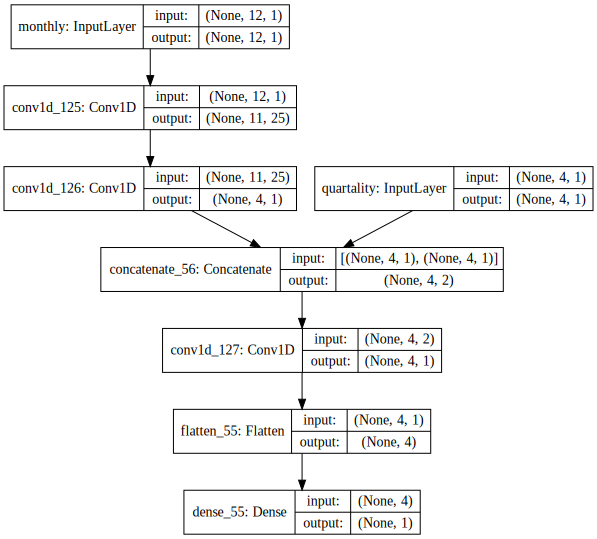

In [648]:
#1-d свертка всегда сворачивает всю панель фаткоров в одно наблюдение.

n_features = X_cnn_train.shape[2]

visible = Input(shape=(n_steps, n_features),name='monthly')
cnn = Conv1D(filters=25, kernel_size=2, 
              activation='linear')(visible)

# cnn = Dropout(0.3)(cnn)

cnn = Conv1D(filters=1, kernel_size=2, 
              strides=3,
              activation='linear')(cnn)
# 
# cnn = Dropout(0.3)(cnn)
#чтоб не смешивать ряды между собой заранее нужно отдельный инпут тогда для каждого 

inv_inp = Input(shape=(4, 1),name='quartality')

z = concatenate([cnn,inv_inp],axis=-1)

merge = Conv1D(filters=1, kernel_size=1, activation='linear')(z)
merge = Flatten()(merge)
output = Dense(1, activation='linear')(merge)
model = Model(inputs=[visible,inv_inp], outputs=output)
model.summary()

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))


In [654]:
opt = Nadam(lr=0.01)
model.compile(optimizer=opt,#Adam(), 
              loss='mean_squared_error')

history = model.fit([X_cnn_train,invest_train], y_cnn_train, 
          epochs = 300, 
          batch_size = 10000, 
          verbose=0, 
          validation_data=([X_cnn_test,invest_test], Y_cnn_test),
          shuffle=False)

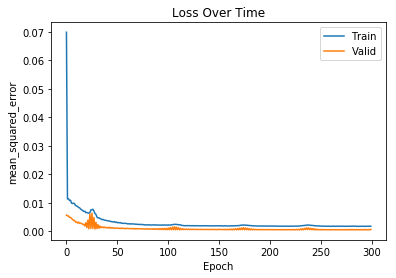

In [655]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

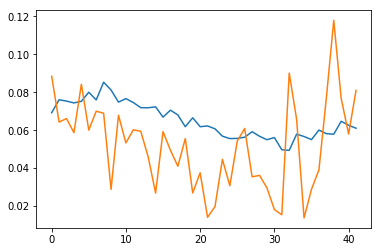

In [656]:
plt.plot(model.predict([X_cnn_test,invest_test]))
plt.plot(Y_cnn_test)

### сохраненная

In [436]:
model_json=model.to_json()
json_file=open('best_full_model.json','w')
json_file.write(model_json)
json_file.close()
model.save_weights("best_full_model.h5")

In [437]:
from keras.models import model_from_json
print("Загружаю сеть из файлов")
# Загружаем данные об архитектуре сети
json_file = open("best_full_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель
loaded_model = model_from_json(loaded_model_json)
# Загружаем сохраненные веса в модель
loaded_model.load_weights("best_full_model.h5")
print("Загрузка сети завершена")

Загружаю сеть из файлов
Загрузка сети завершена


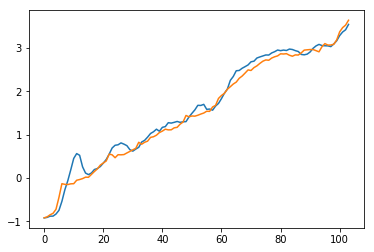

In [438]:
plt.plot(loaded_model.predict([X_cnn_test,invest_test]))
plt.plot(Y_cnn_test)